**Assignment 1
Rahul V S
CSE B
3122235001104**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras

import torch
import torch.nn as nn
import torch.optim as optim

import os
import time

***LoanData***

In [3]:
df=pd.read_csv("loan_data.csv")
print(df)

       person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   O

In [4]:
print(df.head(),df.info(),df.describe(),df.columns,df.shape,df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
num_cols = [
    col for col in df.select_dtypes(include="number").columns
    if df[col].nunique() > 10
]

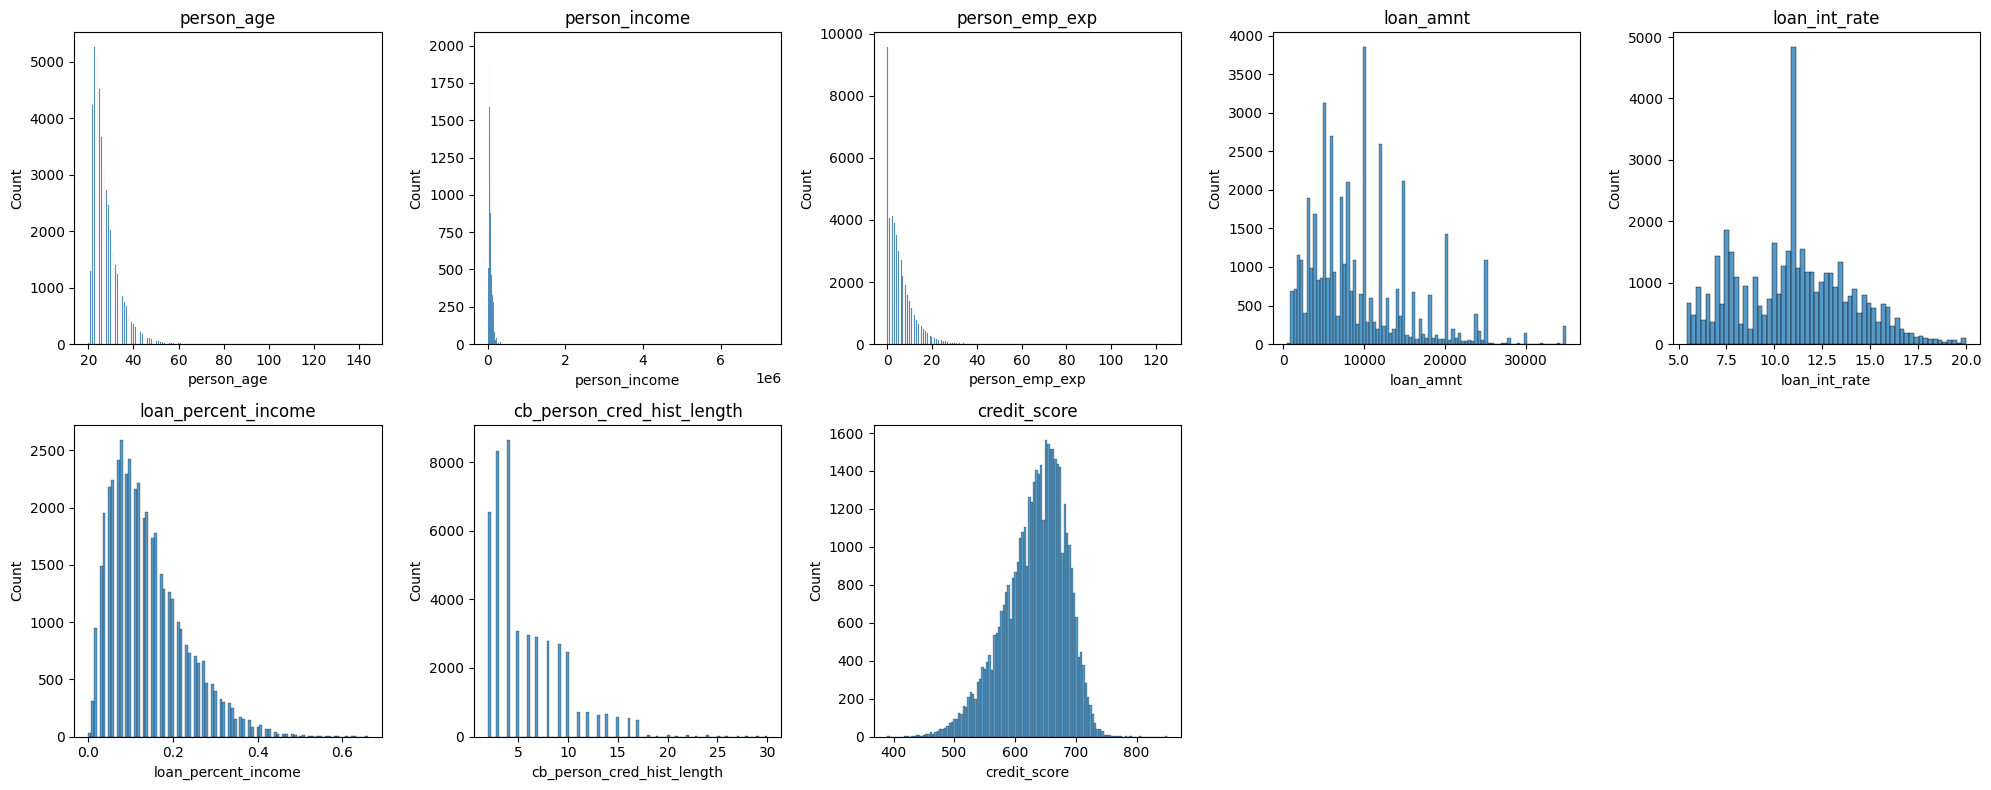

In [6]:
ncols = 5
nrows = (len(num_cols) + ncols - 1) // ncols

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(20, 4 * nrows)
)
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(col)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

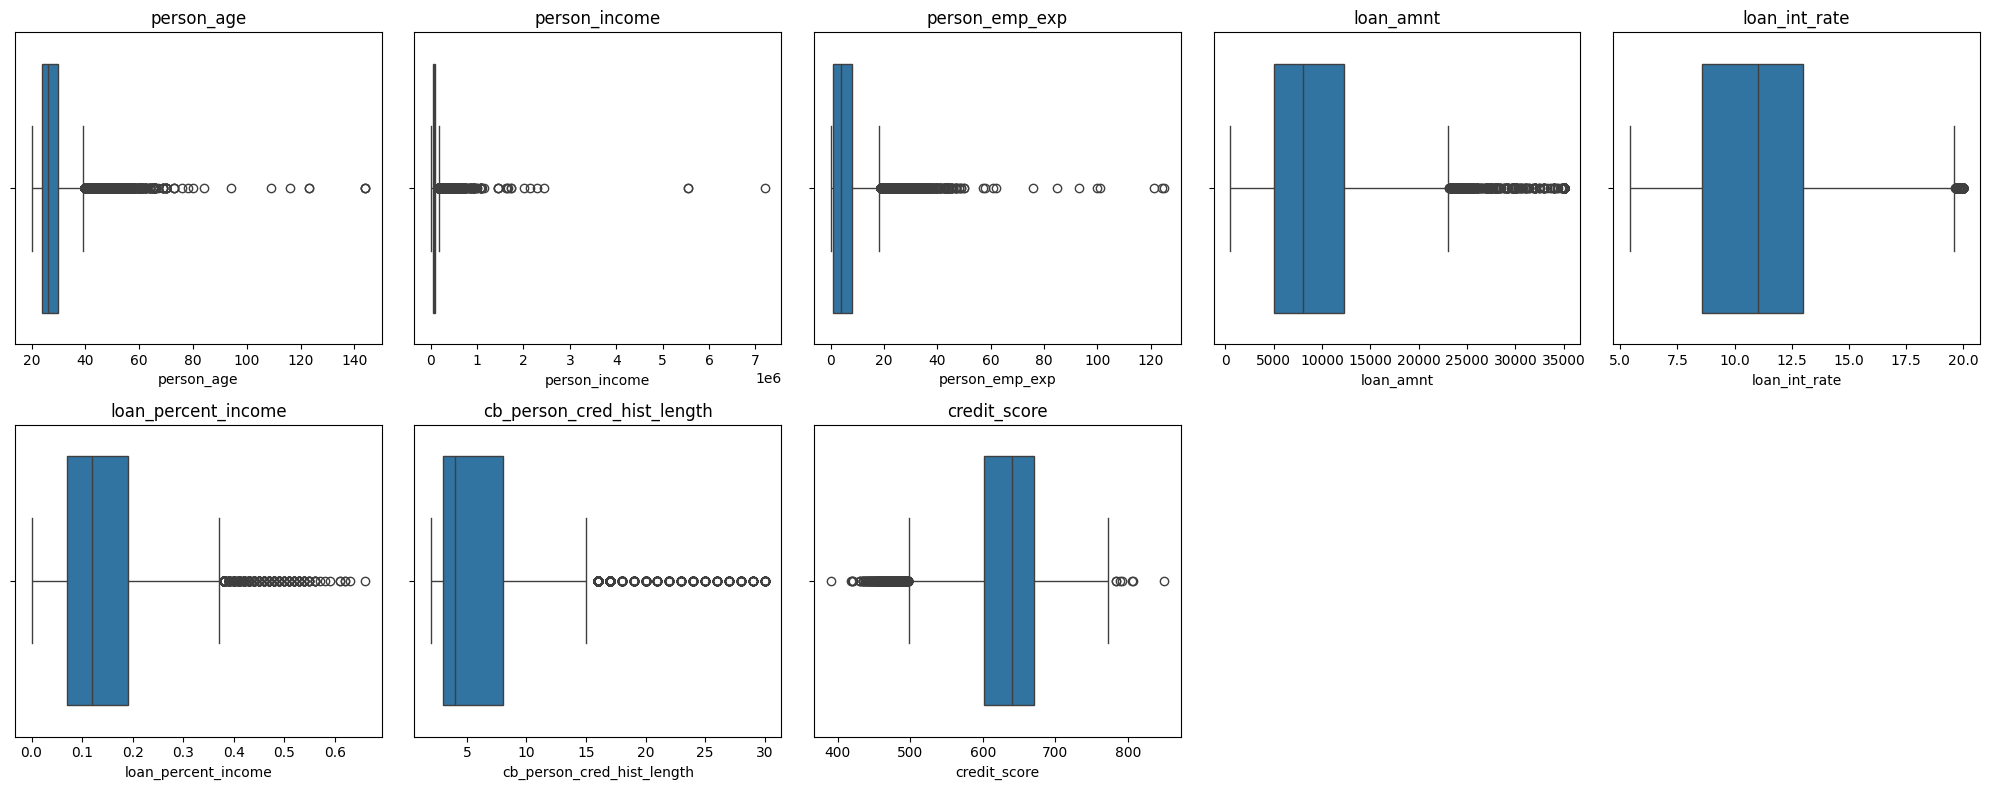

In [7]:
ncols = 5
nrows = (len(num_cols) + ncols - 1) // ncols
fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(20, 4 * nrows)
)
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

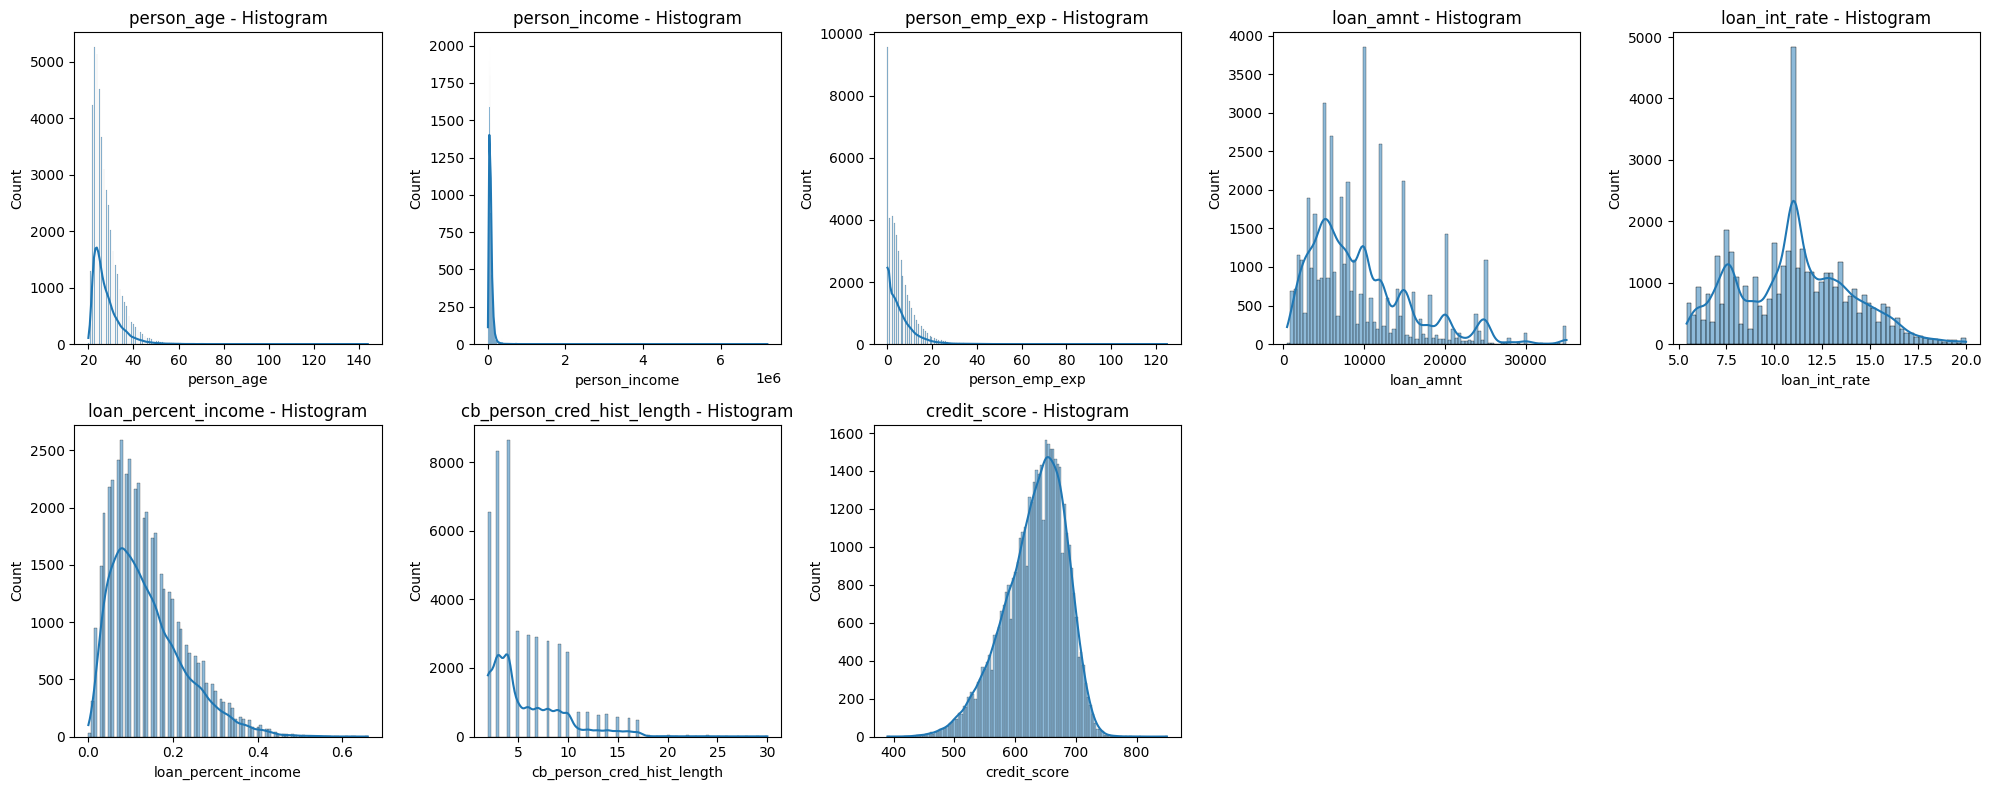

In [8]:
ncols = 5
nrows = (len(num_cols) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 4 * nrows))

# Flatten axes to always use single index
if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"{col} - Histogram")

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

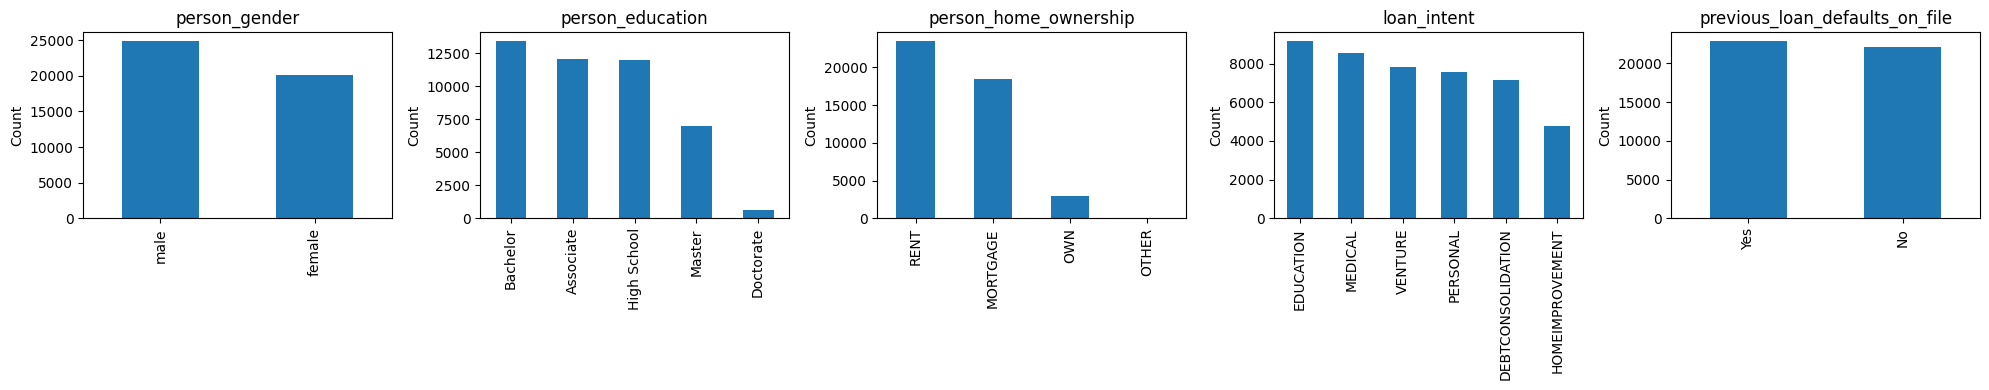

In [9]:
cat_cols = [
    'person_gender', 'person_education',
    'person_home_ownership', 'loan_intent',
    'previous_loan_defaults_on_file'
]

ncols = 5
nrows = (len(cat_cols) + ncols - 1) // ncols

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(20, 4 * nrows)
)

# Make axes always a flat array
if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]

# Plot each categorical column
for i, col in enumerate(cat_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

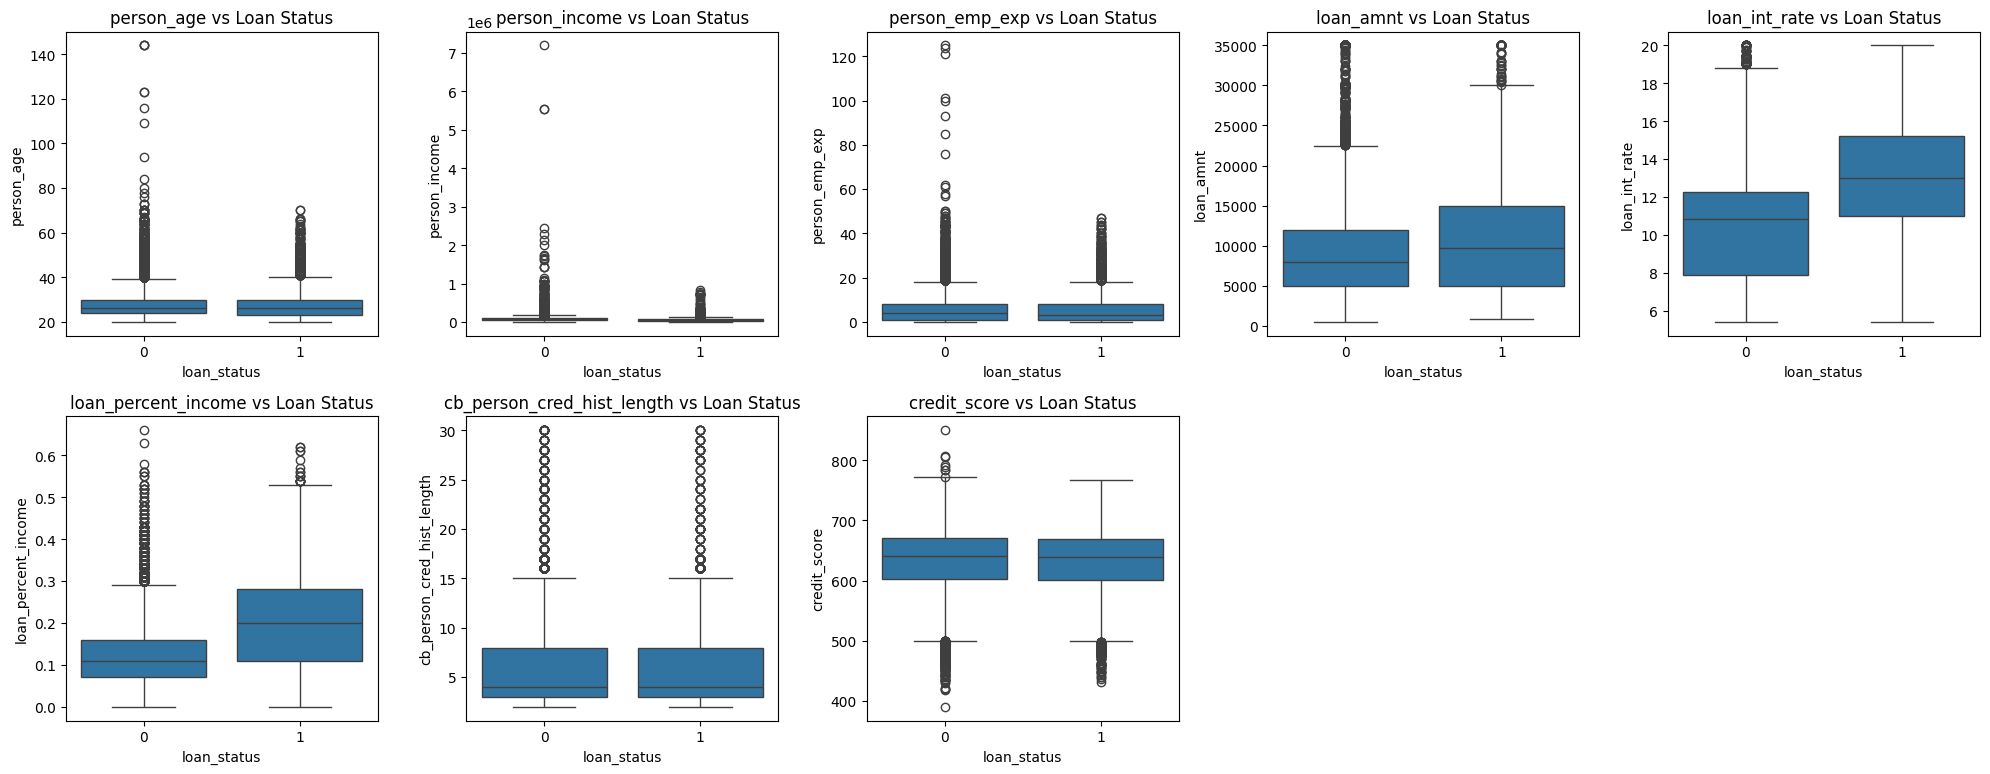

In [10]:
import math

ncols = 5
rows = math.ceil(len(num_cols) / ncols)

fig, axes = plt.subplots(
    nrows=rows,
    ncols=ncols,
    figsize=(20, 4 * rows)
)

axes = axes.flatten()  # easy indexing

for i, col in enumerate(num_cols):
    sns.boxplot(
        x='loan_status',
        y=col,
        data=df,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs Loan Status")

# remove empty plots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

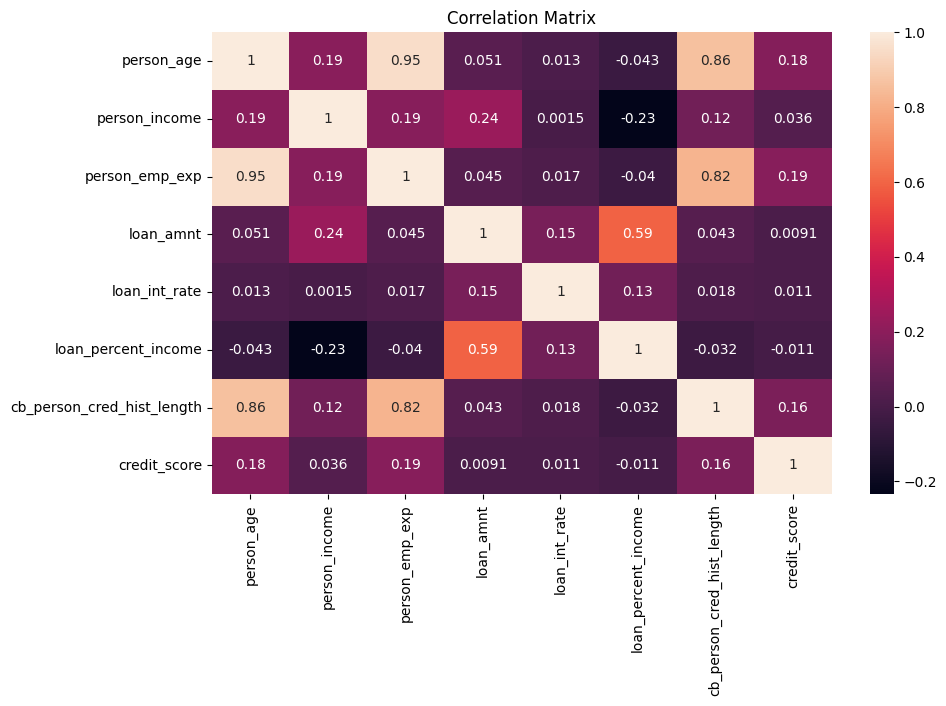

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

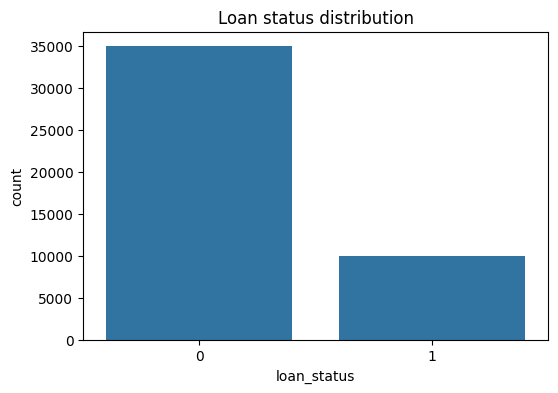

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x="loan_status",data=df)
plt.title("Loan status distribution")
plt.show()

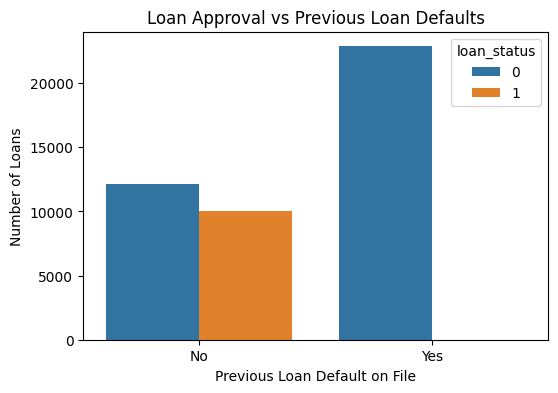

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x='previous_loan_defaults_on_file',
    hue='loan_status',
    data=df
)
plt.title("Loan Approval vs Previous Loan Defaults")
plt.xlabel("Previous Loan Default on File")
plt.ylabel("Number of Loans")
plt.show()

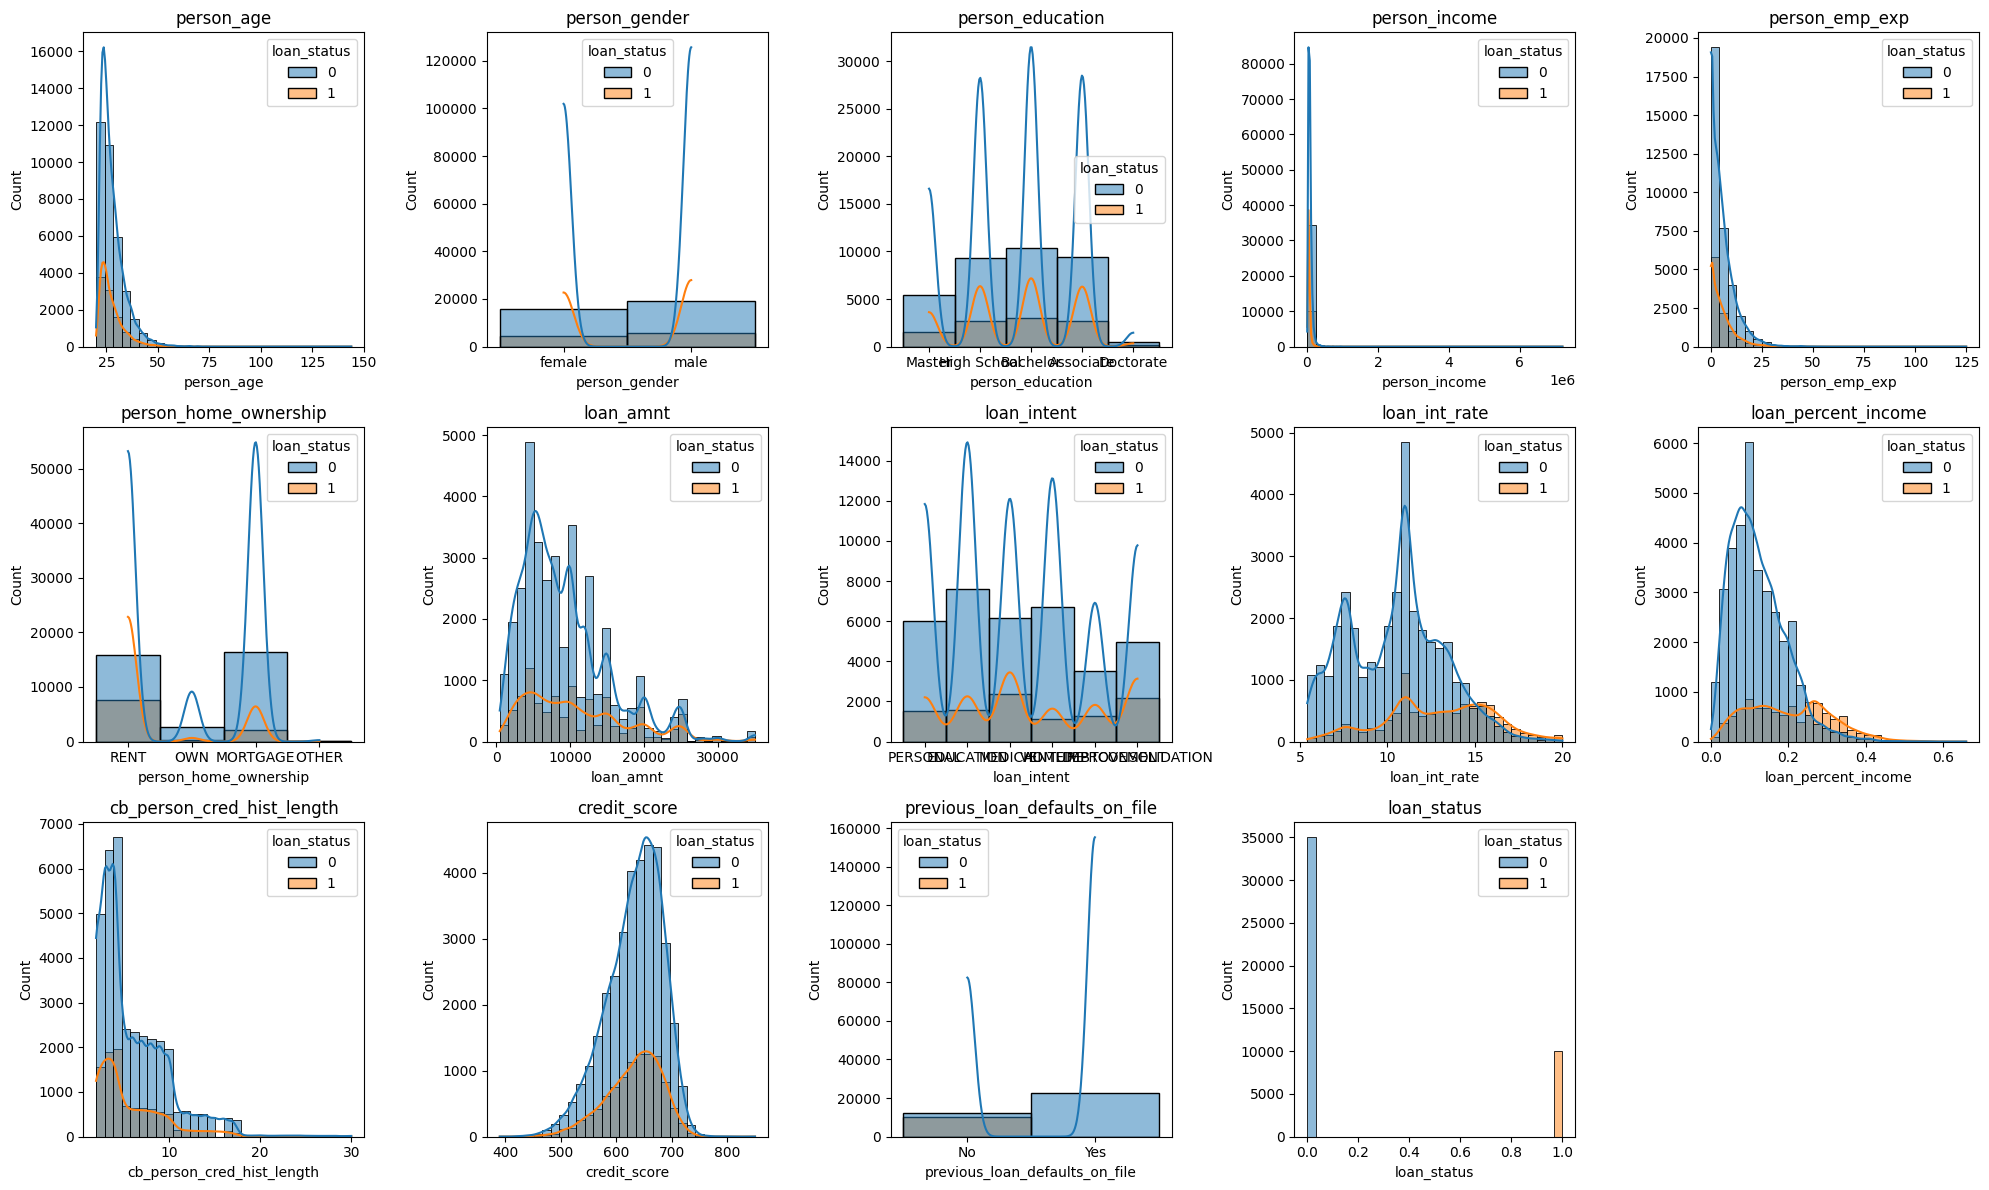

In [14]:
cols = df.columns
n_cols = 5
n_rows = (len(cols) + n_cols - 1) // n_cols  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()  # make indexing easy

for i, col in enumerate(cols):
    sns.histplot(
        data=df,
        x=col,
        hue='loan_status',
        bins=30,
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(col)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [15]:
X_num = df.select_dtypes(include=['int64','float64'])  # numerical
X_cat = df.select_dtypes(include=['object','category'])  # categorical
y = df['loan_status']

In [16]:
X_num_scaled = StandardScaler().fit_transform(X_num)
X_num_scaled

array([[-0.95353824, -0.10408961, -0.89228413, ..., -0.73910854,
        -1.41981408,  1.87082869],
       [-1.11896309, -0.84600467, -0.89228413, ..., -0.99686317,
        -2.5499748 , -0.53452248],
       [-0.45726369, -0.84406489, -0.3975175 , ..., -0.73910854,
         0.04741211,  1.87082869],
       ...,
       [ 0.8661351 , -0.29068126,  0.26217134, ...,  1.06517387,
         0.70171569,  1.87082869],
       [ 0.2044357 , -0.58634807, -0.23259529, ...,  0.03415535,
        -0.5672367 ,  1.87082869],
       [-0.62268854, -0.35699428, -0.72736192, ..., -0.73910854,
        -0.09137955,  1.87082869]])

In [17]:
from sklearn.preprocessing import OneHotEncoder
X_cat_encoded = OneHotEncoder(handle_unknown="ignore").fit_transform(X_cat).toarray()
X_cat_encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [18]:
import numpy as np
X_processed = np.hstack([X_num_scaled, X_cat_encoded])
X_processed

array([[-0.95353824, -0.10408961, -0.89228413, ...,  0.        ,
         1.        ,  0.        ],
       [-1.11896309, -0.84600467, -0.89228413, ...,  0.        ,
         0.        ,  1.        ],
       [-0.45726369, -0.84406489, -0.3975175 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.8661351 , -0.29068126,  0.26217134, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.2044357 , -0.58634807, -0.23259529, ...,  0.        ,
         1.        ,  0.        ],
       [-0.62268854, -0.35699428, -0.72736192, ...,  0.        ,
         1.        ,  0.        ]])

***DiabetesData***

In [19]:
df1=pd.read_csv('diabetes.csv')
df1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [20]:
print(df1.head(),df1.info(),df1.describe(),df1.columns,df1.shape,df1.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           

In [21]:
print(df1.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


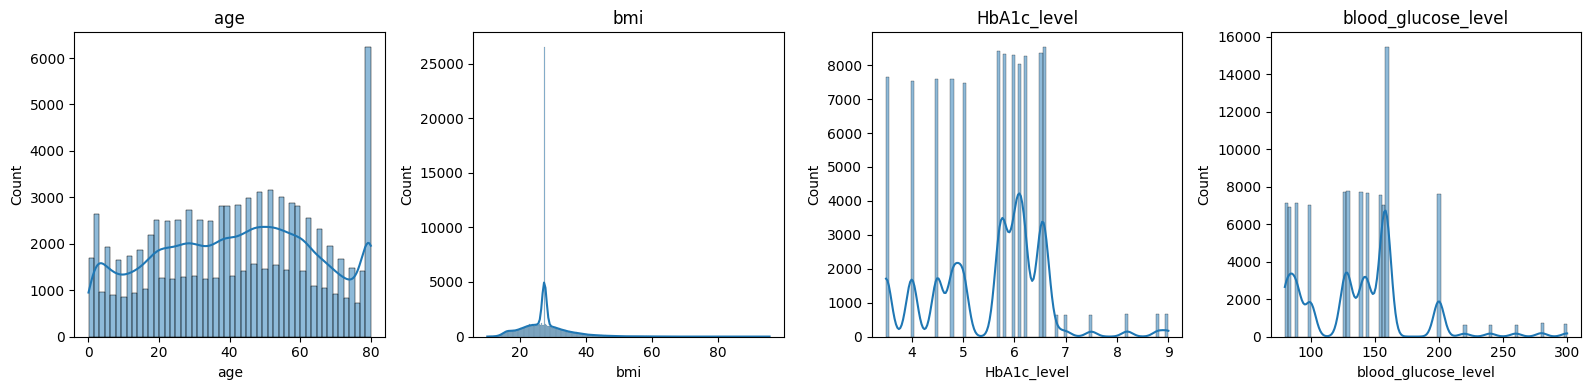

In [22]:
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
ncols=5
nrows=math.ceil(len(num_cols)/ncols)
fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,4*nrows))
axes=axes.flatten()
for i,col in enumerate(num_cols):
    sns.histplot(df1[col],kde=True,ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

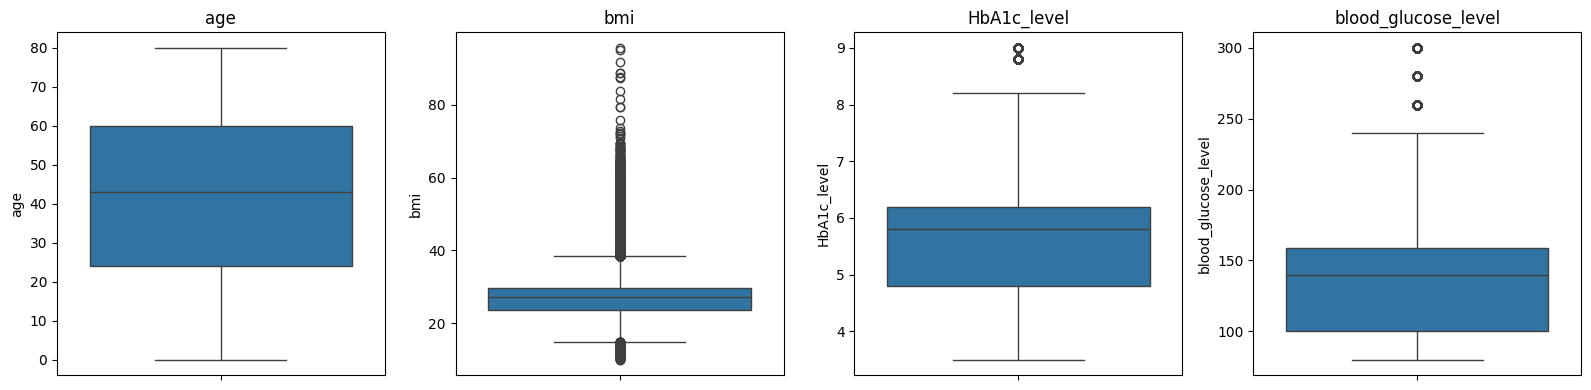

In [23]:
ncols=5
nrows=math.ceil(len(num_cols)/ncols)
fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,4*nrows))
axes=axes.flatten()
for i,col in enumerate(num_cols):
    sns.boxplot(df1[col],ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

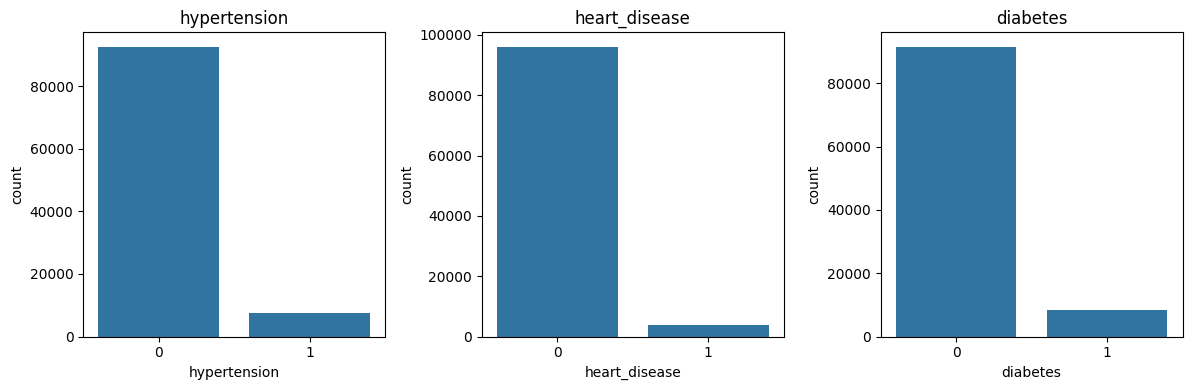

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['hypertension', 'heart_disease', 'diabetes']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,4))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(x=df1[col], ax=axes[i])
    axes[i].set_title(col)


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

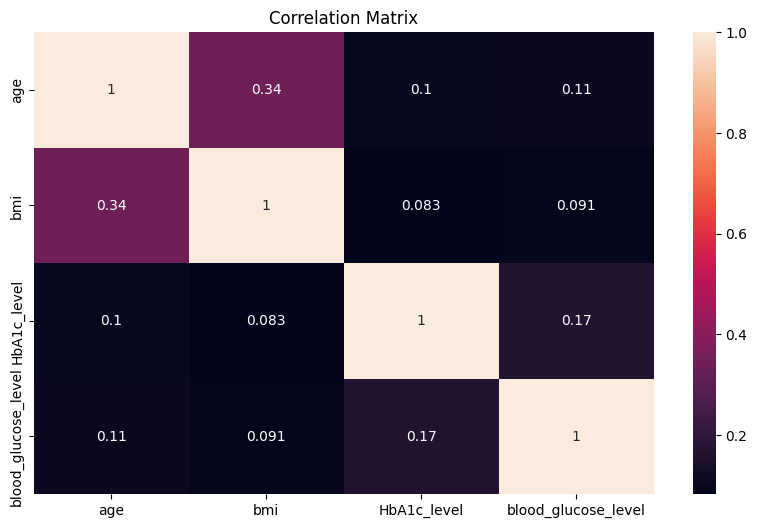

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1[num_cols].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

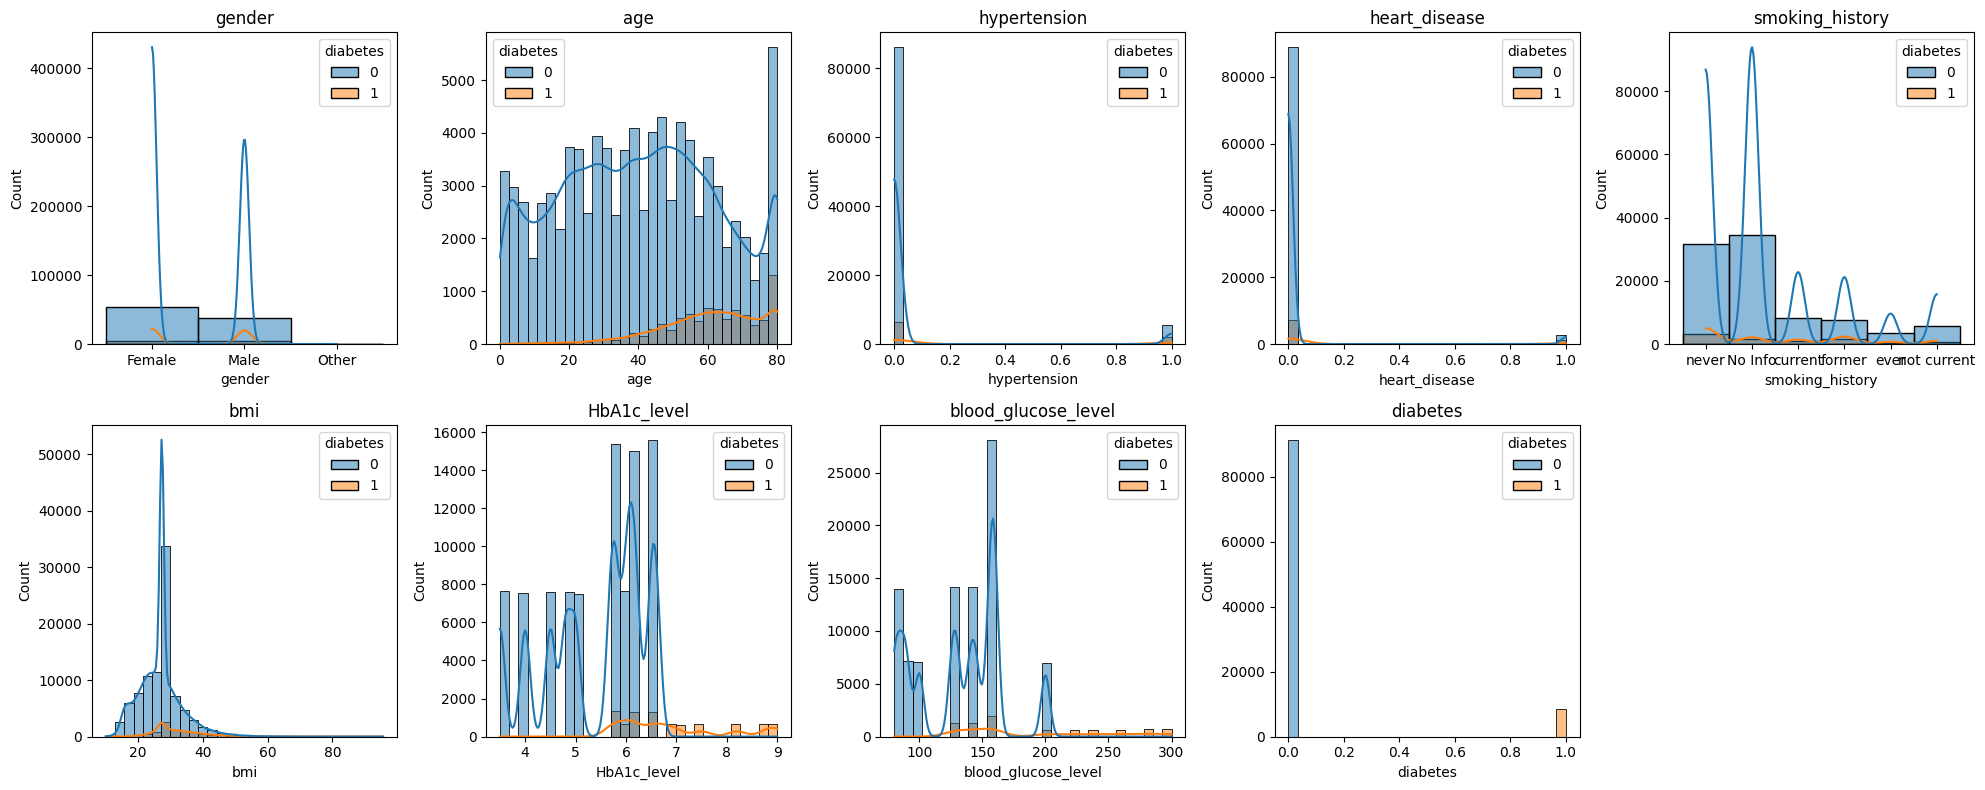

In [26]:
cols = df1.columns
n_cols = 5
n_rows = (len(cols) + n_cols - 1) // n_cols  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()  # make indexing easy

for i, col in enumerate(cols):
    sns.histplot(
        data=df1,
        x=col,
        hue='diabetes',
        bins=30,
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(col)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [27]:
X_num = df1.select_dtypes(include=['int64','float64'])  # numerical
X_cat = df1.select_dtypes(include=['object','category'])  # categorical
y = df1['diabetes']

In [28]:
X_num_scaled = StandardScaler().fit_transform(X_num)
print(X_num_scaled)

[[ 1.69270354 -0.28443945  4.93637859 ...  1.00170572  0.04770422
  -0.30478874]
 [ 0.53800643 -0.28443945 -0.20257766 ...  1.00170572 -1.42620999
  -0.30478874]
 [-0.61669069 -0.28443945 -0.20257766 ...  0.16110802  0.48987848
  -0.30478874]
 ...
 [ 1.07094356 -0.28443945 -0.20257766 ...  0.16110802  0.41618277
  -0.30478874]
 [-0.7943364  -0.28443945 -0.20257766 ... -1.42668764 -0.93490525
  -0.30478874]
 [ 0.67124071 -0.28443945 -0.20257766 ...  1.00170572 -1.18055762
  -0.30478874]]


In [29]:
from sklearn.preprocessing import OneHotEncoder
X_cat_encoded = OneHotEncoder(handle_unknown="ignore").fit_transform(X_cat).toarray()
X_cat_encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [30]:
import numpy as np
X_processed = np.hstack([X_num_scaled, X_cat_encoded])
X_processed

array([[ 1.69270354, -0.28443945,  4.93637859, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.53800643, -0.28443945, -0.20257766, ...,  0.        ,
         0.        ,  0.        ],
       [-0.61669069, -0.28443945, -0.20257766, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.07094356, -0.28443945, -0.20257766, ...,  1.        ,
         0.        ,  0.        ],
       [-0.7943364 , -0.28443945, -0.20257766, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.67124071, -0.28443945, -0.20257766, ...,  0.        ,
         0.        ,  0.        ]])

***EmailClassification***

In [31]:
df = pd.read_csv('spam_ham_dataset.csv')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [32]:
print(df.info())
print(df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
None
Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


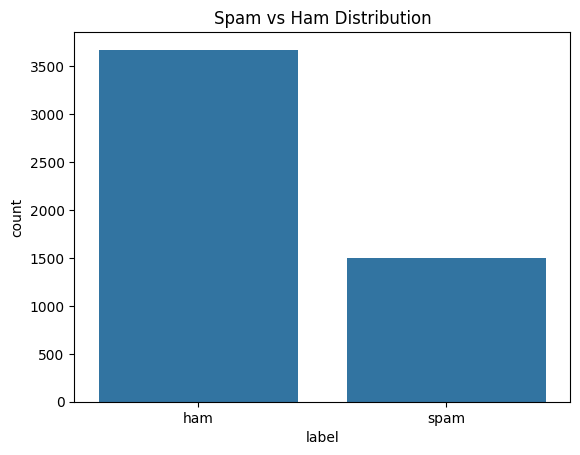

In [33]:
sns.countplot(x='label', data=df)
plt.title('Spam vs Ham Distribution')
plt.show()

In [34]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [35]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df

,Unnamed: 0,label,text,label_num,word_count
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0,67
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0,23
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0,550
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,48
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0,70
...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0,155
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0,305
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0,78
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,111


In [36]:
print(df['label'].value_counts())

label
ham     3672
spam    1499
Name: count, dtype: int64


In [37]:
df.isnull().sum()

,0
Unnamed: 0,0
label,0
text,0
label_num,0
word_count,0


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(df['text'])

words = vectorizer.get_feature_names_out()
word_counts = X.toarray().sum(axis=0)

word_freq = pd.DataFrame(list(zip(words, word_counts)), columns=['Word', 'Frequency'])
word_freq = word_freq.sort_values(by='Frequency', ascending=False)
print(word_freq.head(10))

      Word  Frequency
4      ect      13900
9  subject       8060
7      hou       7289
5    enron       6555
1     2000       4386
2      com       3709
6      gas       3034
3     deal       2827
8    meter       2459
0       00       2404


In [39]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [40]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    cleaned_text = ' '.join(words)
    return cleaned_text

df['cleaned_text'] = df['text'].apply(preprocess_text)
df

,Unnamed: 0,label,text,label_num,word_count,cleaned_text
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0,67,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0,23,subject hpl nom january 9 2001 see attached fi...
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0,550,subject neon retreat ho ho ho around wonderful...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,48,subject photoshop window office cheap main tre...
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0,70,subject indian spring deal book teco pvr reven...
...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0,155,subject put 10 ft transport volume decreased 2...
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0,305,subject 3 4 2000 following noms hpl take extra...
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0,78,subject calpine daily gas nomination julie men...
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,111,subject industrial worksheet august 2000 activ...


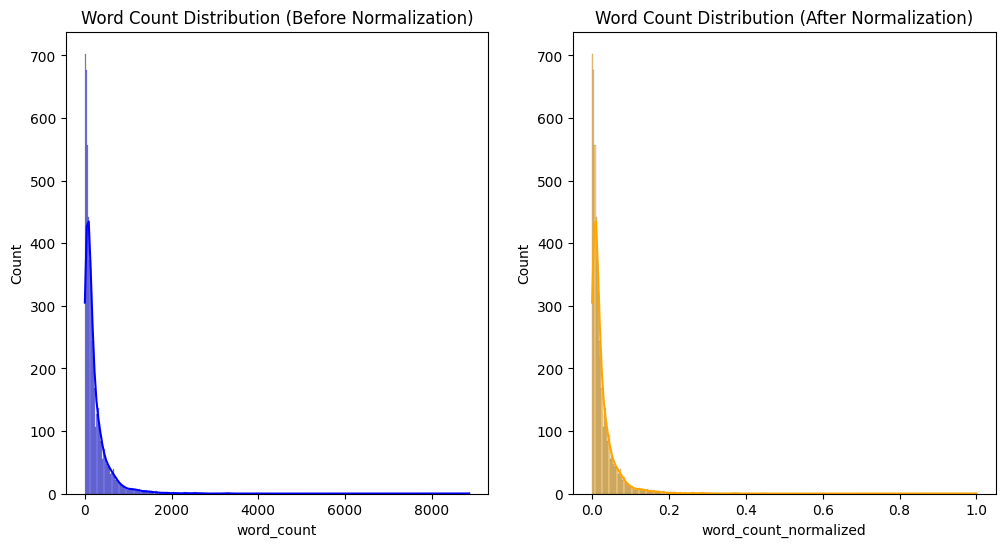

In [41]:
scaler = MinMaxScaler()
df['word_count_normalized'] = scaler.fit_transform(df[['word_count']])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['word_count'], kde=True, color='blue')
plt.title('Word Count Distribution (Before Normalization)')

plt.subplot(1, 2, 2)
sns.histplot(df['word_count_normalized'], kde=True, color='orange')
plt.title('Word Count Distribution (After Normalization)')

plt.show()

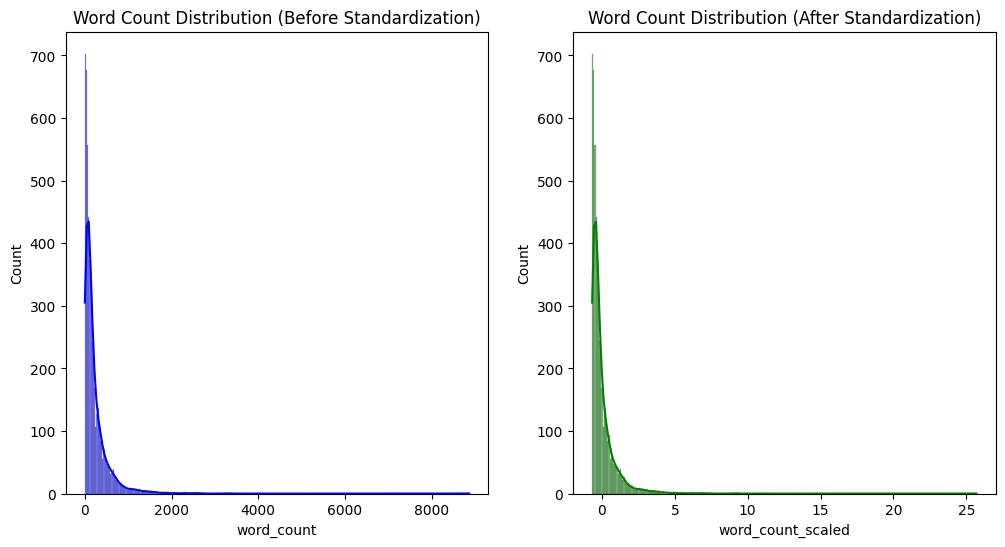

In [42]:
scaler = StandardScaler()
df['word_count_scaled'] = scaler.fit_transform(df[['word_count']])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['word_count'], kde=True, color='blue')
plt.title('Word Count Distribution (Before Standardization)')

plt.subplot(1, 2, 2)
sns.histplot(df['word_count_scaled'], kde=True, color='green')
plt.title('Word Count Distribution (After Standardization)')

plt.show()

In [43]:
df

,Unnamed: 0,label,text,label_num,word_count,cleaned_text,word_count_normalized,word_count_scaled
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0,67,subject enron methanol meter 988291 follow not...,0.007448,-0.478524
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0,23,subject hpl nom january 9 2001 see attached fi...,0.002483,-0.609477
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0,550,subject neon retreat ho ho ho around wonderful...,0.061957,0.958980
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,48,subject photoshop window office cheap main tre...,0.005304,-0.535072
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0,70,subject indian spring deal book teco pvr reven...,0.007787,-0.469595
...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0,155,subject put 10 ft transport volume decreased 2...,0.017380,-0.216618
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0,305,subject 3 4 2000 following noms hpl take extra...,0.034308,0.229811
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0,78,subject calpine daily gas nomination julie men...,0.008690,-0.445786
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,111,subject industrial worksheet august 2000 activ...,0.012414,-0.347571


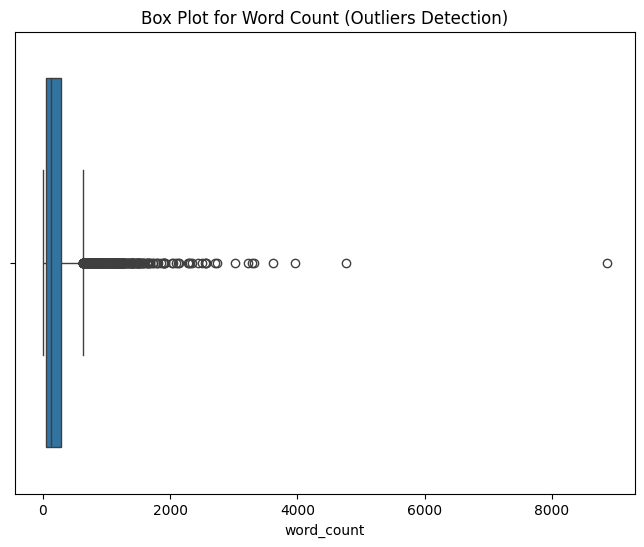

,Unnamed: 0,label,text,label_num,word_count,cleaned_text,word_count_normalized,word_count_scaled
15,4791,spam,Subject: underpriced issue with high return on...,1,1681,subject underpriced issue high return equity s...,0.189595,4.325060
24,4827,spam,Subject: jump in to gain substantial ground im...,1,1392,subject jump gain substantial ground immediate...,0.156980,3.464939
49,577,ham,Subject: fw : fw : gap gift certificates\n- - ...,0,2287,subject fw fw gap gift certificate original me...,0.257984,6.128636
60,4834,spam,Subject: the bull reccomends this stokkpic\nya...,1,1563,subject bull reccomends stokkpic yap internati...,0.176278,3.973869
151,1429,ham,Subject: re : meter # : 1266 ; august 2000 / a...,0,1237,subject meter 1266 august 2000 allocation exce...,0.139488,3.003628
...,...,...,...,...,...,...,...,...
5040,4799,spam,Subject: stock opportunities\nthe u . s . oil\...,1,1512,subject stock opportunity u oil report hot new...,0.170523,3.822083
5041,3738,spam,"Subject: ( otcbb : itst ) up 38 % , uregent ne...",1,2051,subject otcbb itst 38 uregent news alert urgen...,0.231351,5.426253
5087,1295,ham,Subject: fw : please read . . don ' t delete\n...,0,2501,subject fw please read delete original message...,0.282135,6.765543
5119,446,ham,Subject: bpa rate case - seasonal rates\n- - -...,0,1895,subject bpa rate case seasonal rate forwarded ...,0.213746,4.961967


In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['word_count'])
plt.title('Box Plot for Word Count (Outliers Detection)')
plt.show()

z_scores = np.abs((df['word_count'] - df['word_count'].mean()) / df['word_count'].std())
outliers = df[z_scores > 3]
#print("Outliers detected using Z-score:", outliers)
outliers

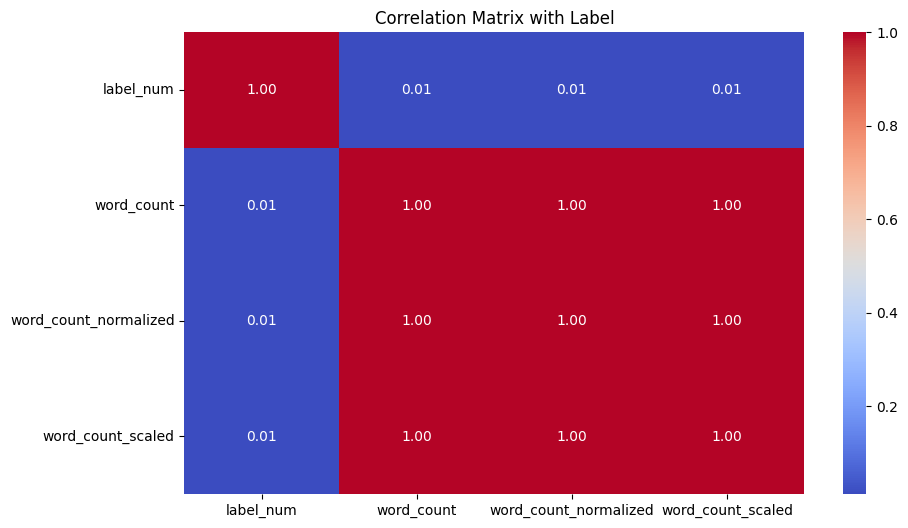

In [45]:
df_cleaned = df.drop(columns=['Unnamed: 0'])

numeric_df = df_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix with Label")
plt.show()

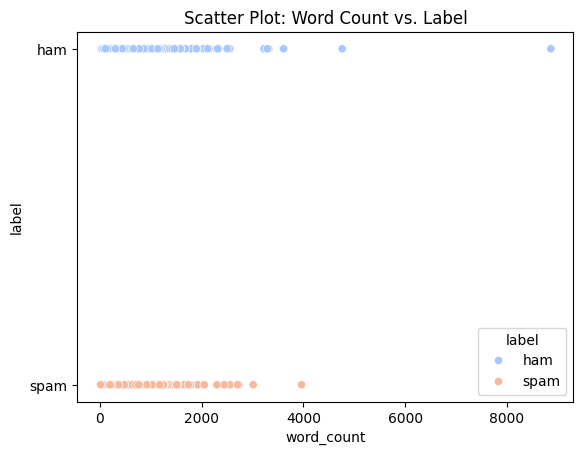

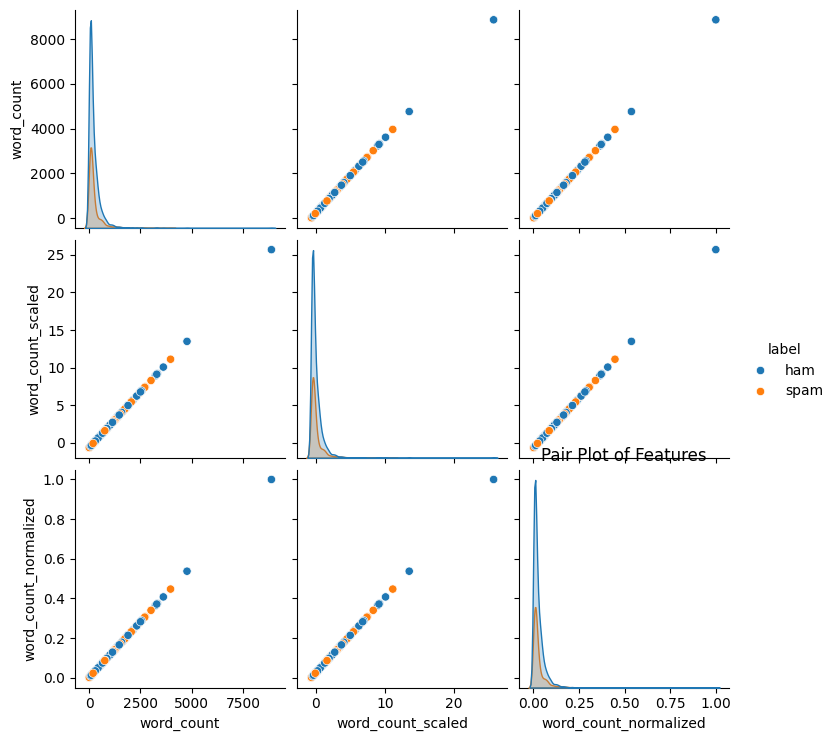

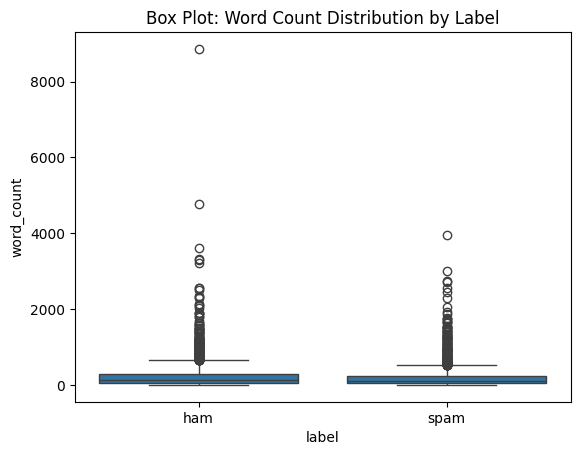

In [46]:
sns.scatterplot(x='word_count', y='label', data=df, hue='label', palette='coolwarm')
plt.title("Scatter Plot: Word Count vs. Label")
plt.show()

sns.pairplot(df[['word_count', 'word_count_scaled', 'word_count_normalized', 'label']], hue='label')
plt.title("Pair Plot of Features")
plt.show()

sns.boxplot(x='label', y='word_count', data=df)
plt.title("Box Plot: Word Count Distribution by Label")
plt.show()

***IrisClassificationData***

In [47]:
import pandas as pd

# Correct column names (including Id temporarily)
column_names = ['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Read CSV:
# header=None → because file structure is messy
# skiprows=[1] → skip the second header row
df = pd.read_csv("Iris.csv", header=None, names=column_names, skiprows=[1])

# Drop the Id column (not needed)
df.drop(columns=['id'], inplace=True)

# Convert numeric columns explicitly
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# 2. Inspect the data
print("First 5 rows (now correct):")
display(df.head())

print("\nData Info:")
print(df.info())

print("\nSummary Statistics:")
display(df.describe())

First 5 rows (now correct):


,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,NaN,NaN,NaN,Species
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary Statistics:


,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [48]:
df = df.iloc[1:].reset_index(drop=True)

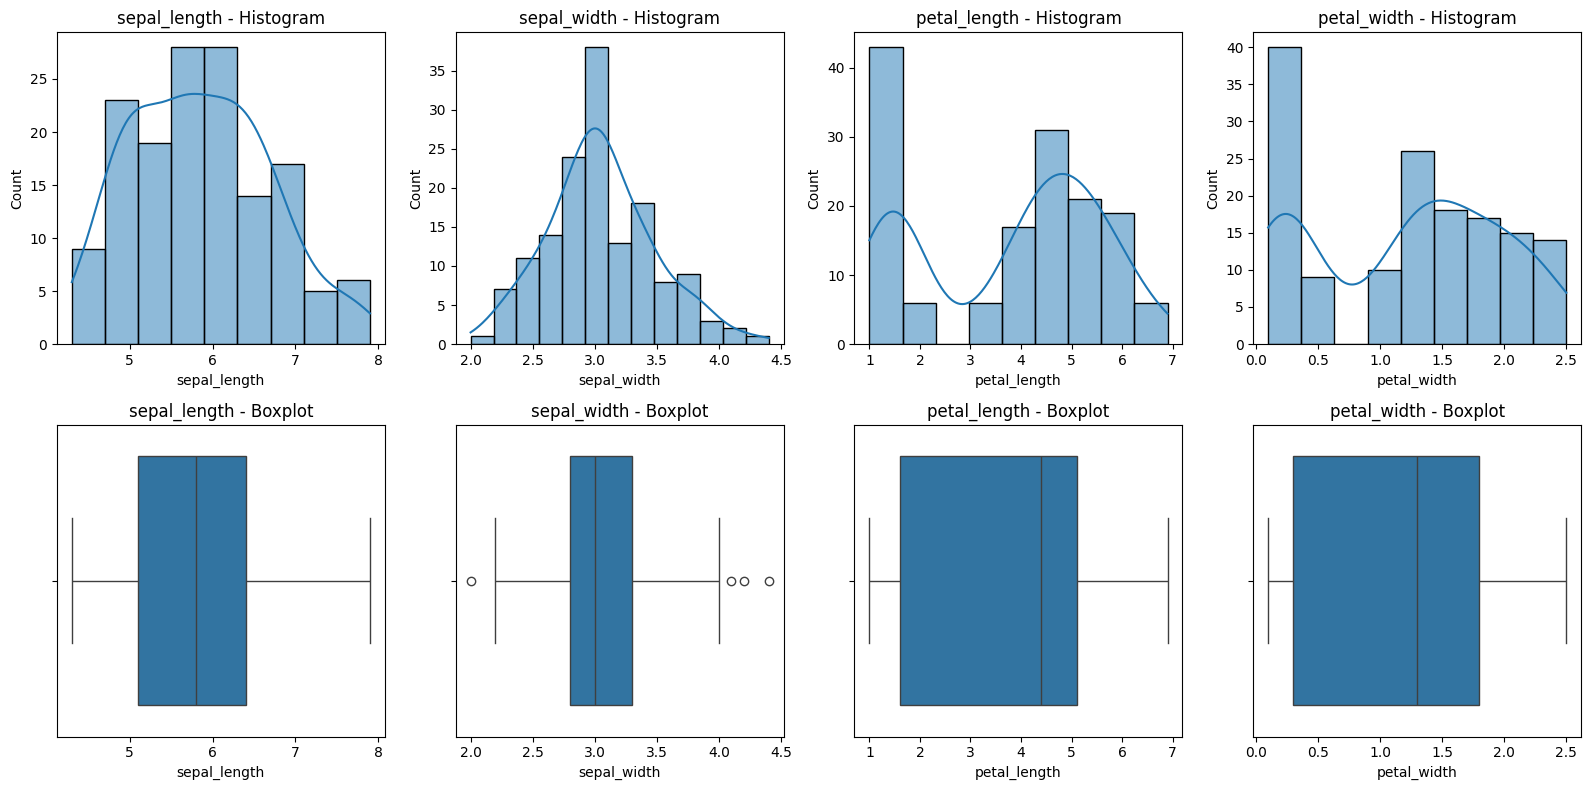

In [49]:
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

ncols = 5
nrows = 2 * math.ceil(len(num_cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"{col} - Histogram")

    # Boxplot (placed directly below)
    sns.boxplot(x=df[col], ax=axes[i + ncols])
    axes[i + ncols].set_title(f"{col} - Boxplot")

# Remove unused subplots
for j in range(len(num_cols), ncols):
    fig.delaxes(axes[j])
    fig.delaxes(axes[j + ncols])

plt.tight_layout()
plt.show()

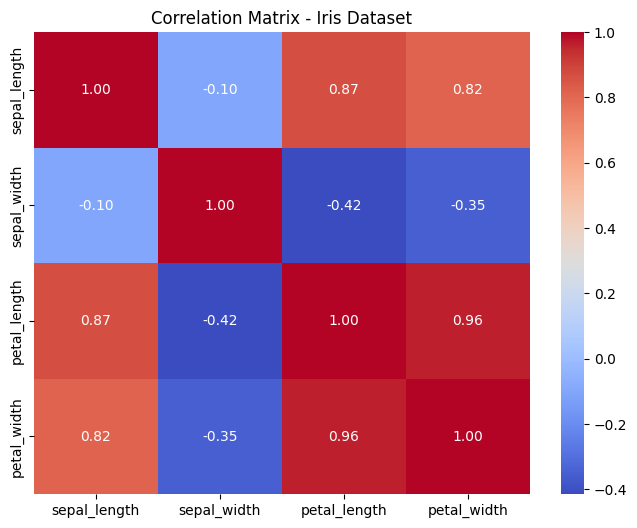

In [50]:
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix - Iris Dataset")
plt.show()

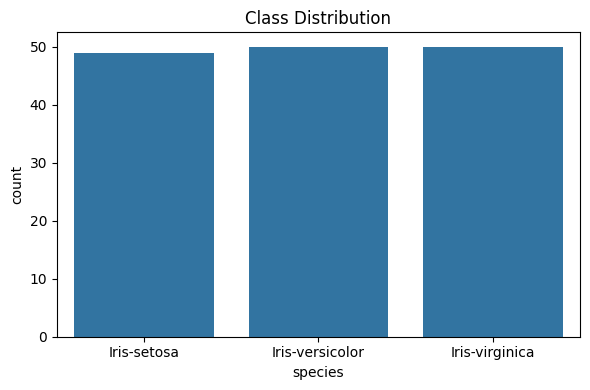

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

sns.countplot(x='species', data=df, ax=ax)
ax.set_title("Class Distribution")

plt.tight_layout()
plt.show()

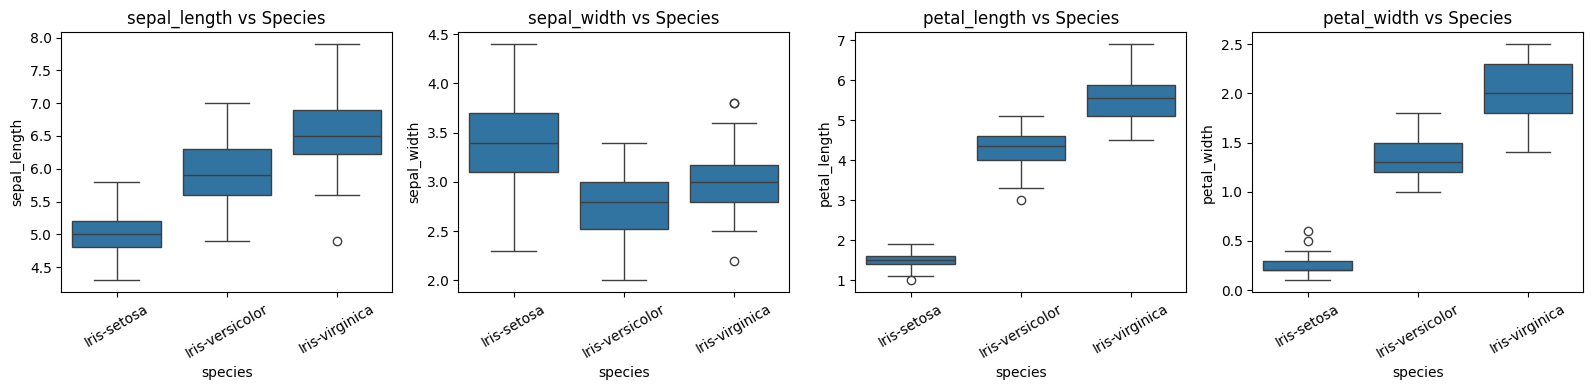

In [52]:
ncols = 5
nrows = math.ceil(len(num_cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x='species', y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Species")
    axes[i].tick_params(axis='x', rotation=30)

# Remove unused subplots
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

(3411, 2)
label
0        55
1        55
2        55
4        55
3        55
         ..
v        55
y        55
x        55
z        55
label     1
Name: count, Length: 63, dtype: int64


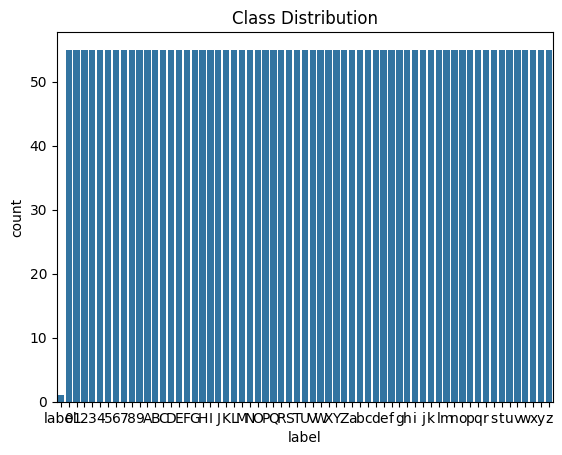

In [53]:
df = pd.read_csv("english.csv", names=['image_path','label'])

print(df.shape)
print(df['label'].value_counts())

sns.countplot(x='label', data=df)
plt.title("Class Distribution")
plt.show()

***HandwrittenImages***

Image not found: D:\ML\Img/img001-001.png
Image not found: D:\ML\Img/img001-002.png
Image not found: D:\ML\Img/img001-003.png
Image not found: D:\ML\Img/img001-004.png
Image not found: D:\ML\Img/img001-005.png
Image not found: D:\ML\Img/img001-006.png
Image not found: D:\ML\Img/img001-007.png
Image not found: D:\ML\Img/img001-008.png
Image not found: D:\ML\Img/img001-009.png
Image not found: D:\ML\Img/img001-010.png
Image not found: D:\ML\Img/img001-011.png
Image not found: D:\ML\Img/img001-012.png
Image not found: D:\ML\Img/img001-013.png
Image not found: D:\ML\Img/img001-014.png
Image not found: D:\ML\Img/img001-015.png
Image not found: D:\ML\Img/img001-016.png
Image not found: D:\ML\Img/img001-017.png
Image not found: D:\ML\Img/img001-018.png
Image not found: D:\ML\Img/img001-019.png
Image not found: D:\ML\Img/img001-020.png
Image not found: D:\ML\Img/img001-021.png
Image not found: D:\ML\Img/img001-022.png
Image not found: D:\ML\Img/img001-023.png
Image not found: D:\ML\Img/img001-

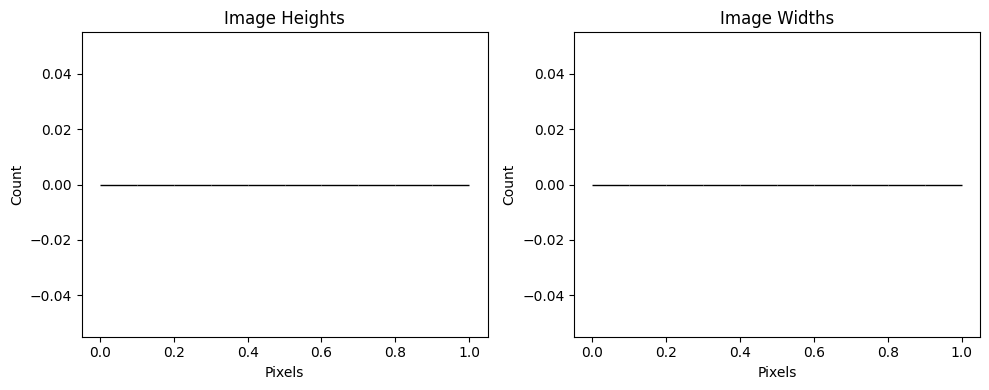

In [54]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_folder = r"D:\ML\Img"

heights, widths = [], []

# Skip first row (invalid 'image') and process remaining
for path in df['image_path'][1:101]:  # first 100 valid images
    img_file = os.path.basename(path)  # get just the filename
    img_path = os.path.join(img_folder, img_file)

    if not os.path.exists(img_path):
        print("Image not found:", img_path)
        continue

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Failed to read:", img_path)
        continue

    h, w = img.shape
    heights.append(h)
    widths.append(w)

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(heights, bins=10, color='skyblue', edgecolor='black')
axes[0].set_title("Image Heights")
axes[0].set_xlabel("Pixels")
axes[0].set_ylabel("Count")
axes[1].hist(widths, bins=10, color='salmon', edgecolor='black')
axes[1].set_title("Image Widths")
axes[1].set_xlabel("Pixels")
axes[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

In [55]:
print(df['image_path'][:10])

0                 image
1    Img/img001-001.png
2    Img/img001-002.png
3    Img/img001-003.png
4    Img/img001-004.png
5    Img/img001-005.png
6    Img/img001-006.png
7    Img/img001-007.png
8    Img/img001-008.png
9    Img/img001-009.png
Name: image_path, dtype: object


Image not found: D:\ML\Img/img001-001.png
Image not found: D:\ML\Img/img001-002.png
Image not found: D:\ML\Img/img001-003.png
Image not found: D:\ML\Img/img001-004.png
Image not found: D:\ML\Img/img001-005.png


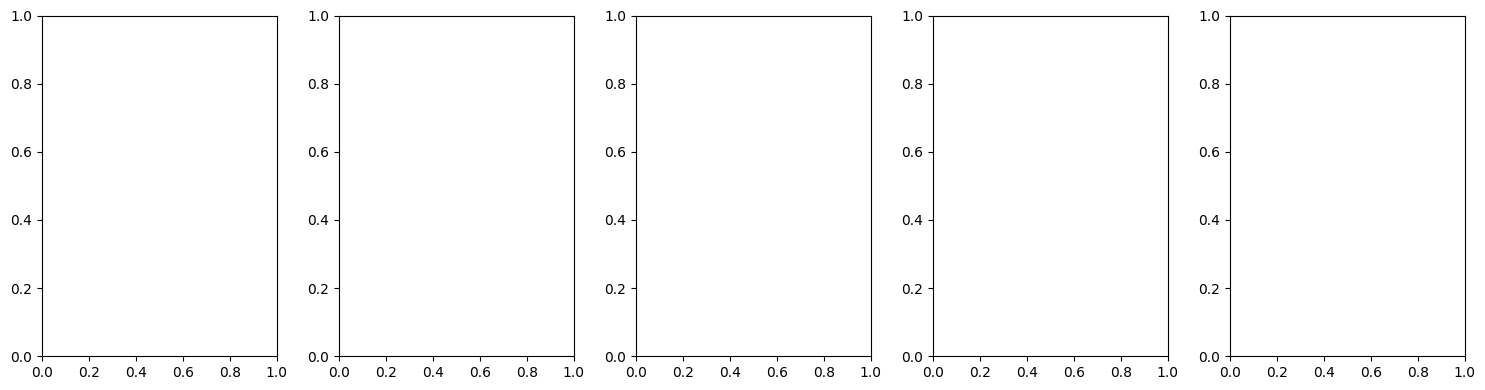

In [56]:
img_folder = r"D:\ML\Img"

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

# Skip first invalid row and take first 5 valid images
for i, path in enumerate(df['image_path'][1:6]):
    # Get the filename only
    img_file = os.path.basename(path)
    img_path = os.path.join(img_folder, img_file)

    # Check if file exists
    if not os.path.exists(img_path):
        print("Image not found:", img_path)
        continue

    # Read image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Failed to read:", img_path)
        continue

    # Plot histogram
    axes[i].hist(img.ravel(), bins=50, color='gray')
    axes[i].set_title(f"Image {i+1}")
    axes[i].set_xlabel("Pixel Value")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

No valid images found for class label
Image not found: D:\ML\Img/img001-002.png
Image not found: D:\ML\Img/img001-003.png
Image not found: D:\ML\Img/img001-004.png
Image not found: D:\ML\Img/img001-005.png
Image not found: D:\ML\Img/img001-006.png
Image not found: D:\ML\Img/img001-007.png
Image not found: D:\ML\Img/img001-008.png
Image not found: D:\ML\Img/img001-009.png
Image not found: D:\ML\Img/img001-010.png
Image not found: D:\ML\Img/img001-011.png
Image not found: D:\ML\Img/img001-012.png
Image not found: D:\ML\Img/img001-013.png
Image not found: D:\ML\Img/img001-014.png
Image not found: D:\ML\Img/img001-015.png
Image not found: D:\ML\Img/img001-016.png
Image not found: D:\ML\Img/img001-017.png
Image not found: D:\ML\Img/img001-018.png
Image not found: D:\ML\Img/img001-019.png
Image not found: D:\ML\Img/img001-020.png
Image not found: D:\ML\Img/img001-021.png
No valid images found for class 0
Image not found: D:\ML\Img/img002-002.png
Image not found: D:\ML\Img/img002-003.png
Imag

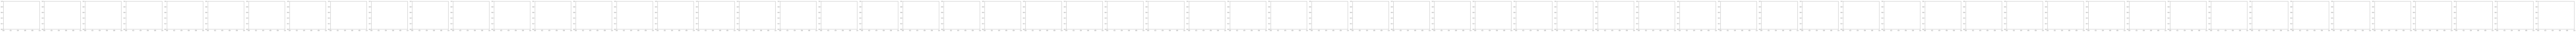

In [57]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_folder = r"D:\ML\Img"

# get unique class labels
classes = df['label'].unique()

fig, axes = plt.subplots(1, len(classes), figsize=(5*len(classes), 4))

for i, label in enumerate(classes):
    imgs = []
    # skip first row (invalid) and take first 20 images
    for path in df[df['label']==label]['image_path'][1:21]:
        img_file = os.path.basename(path)
        img_path = os.path.join(img_folder, img_file)

        if not os.path.exists(img_path):
            print("Image not found:", img_path)
            continue

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print("Failed to read:", img_path)
            continue

        imgs.append(img)

    if len(imgs) == 0:
        print(f"No valid images found for class {label}")
        continue

    mean_img = np.mean(imgs, axis=0)
    axes[i].imshow(mean_img, cmap='gray')
    axes[i].set_title(f"Mean Class {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

/tmp/ipython-input-4071817813.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Missing','Exists'])


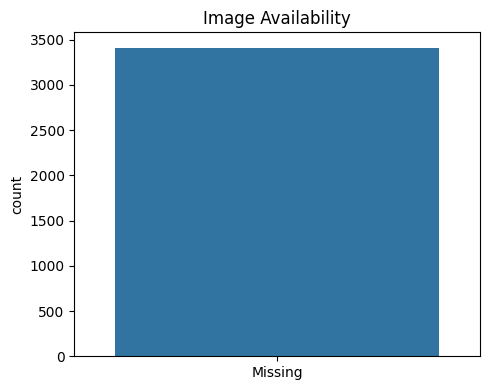

In [58]:
import os

exists = []
for path in df['image_path']:
    exists.append(os.path.exists(path))

fig, ax = plt.subplots(1,1, figsize=(5,4))
sns.countplot(x=exists, ax=ax)
ax.set_xticklabels(['Missing','Exists'])
ax.set_title("Image Availability")

plt.tight_layout()
plt.show()